# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load Data

### 1-Load the dataset into pandas and provide a summary of columns in the loaded dataset without any modification.

In [2]:
data=pd.read_csv('all_data_copy.csv')  # reading csv file into dataframe 'data'

In [3]:
data.shape   #size of data

(373700, 6)

In [4]:
type(data)     #datatype of our 'data'

pandas.core.frame.DataFrame

In [5]:
data.head(10)    #top 10 rows to 'data'

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


In [6]:
data.tail(10)  #bottom 10 rows of data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373690,259349,AAA Batteries (4-pack),1,2.99,09/01/19 22:14,"911 River St, Dallas, TX 75001"
373691,259350,Google Phone,1,600,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016"
373692,259350,USB-C Charging Cable,1,11.95,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016"
373693,259351,Apple Airpods Headphones,1,150,09/01/19 19:43,"981 4th St, New York City, NY 10001"
373694,259352,USB-C Charging Cable,1,11.95,09/07/19 15:49,"976 Forest St, San Francisco, CA 94016"
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
373696,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
373699,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [7]:
data.info()   # concise summary 'data'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 17.1+ MB


### 2-Prepare the data frame for further analysis. Clean it, mold it in any manner you see fit.

In [8]:
data.isnull().sum()   #calculation of null values by each column

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

In [9]:
sum(data.isnull().sum())/len(data)*100  #calculating null value % in data

1.75006689858175

SO we have around 1.8 % missing value so we can drop them as atleast 25 % of data is allowed to drop which has missing value
so we good to go with dropna

In [10]:
data.dropna(inplace=True)  #dropping missing values from 'data'

In [11]:
data.isnull().sum()     #confirming with .isnull()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [12]:
#we observed that there are 710 columns in which values in rows are the same as the header.
data[data['Quantity Ordered']=='Quantity Ordered']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
372014,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
372401,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373413,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373482,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [13]:
#so making a new data frame where these values will be excluded.
data_cleaned=data[data['Quantity Ordered']!='Quantity Ordered']

In [14]:
data_cleaned.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [15]:
#checking whether there is any repeated rows in our data
ids = data_cleaned["Order ID"]
data_cleaned[ids.isin(ids[ids.duplicated()])].sort_values("Order ID")

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
254397,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
254398,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
242359,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"
242360,319670,Bose SoundSport Headphones,1,99.99,12/21/19 21:45,"747 Chestnut St, Los Angeles, CA 90001"


In [16]:
data_cleaned=data_cleaned.drop_duplicates(keep='first') #dropping duplicate rows

### 3-Provide a summary of the cleaned dataset along with some preliminary analysis and contrast it with the uncleaned dataset wherever modifications are made.

In [17]:
data_cleaned.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [18]:
data_cleaned.shape

(185686, 6)

In [19]:
df=data_cleaned.copy()  #copying data into 'df' dataframe

In [20]:
# spilting city from purchase address
city=[]
for c in data_cleaned['Purchase Address']:
    city.append(c.split(',')[1])
df['City']=city

In [21]:
#df['City']=df['Purchase Address'].apply(lamda x:','split()[1])

In [22]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Austin


In [23]:
#converting Quantity ordered  and price each object to float
df['Quantity Ordered']=df['Quantity Ordered'].astype(float)
df['Price Each']=df['Price Each'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185686 non-null  object 
 1   Product           185686 non-null  object 
 2   Quantity Ordered  185686 non-null  float64
 3   Price Each        185686 non-null  float64
 4   Order Date        185686 non-null  object 
 5   Purchase Address  185686 non-null  object 
 6   City              185686 non-null  object 
dtypes: float64(2), object(5)
memory usage: 11.3+ MB


In [24]:
#adding a “Sales” column to this dataframe by multiplying Quantity ordered and Price of each item.
df['Sales']=df['Quantity Ordered']*df['Price Each']

In [25]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Sales
0,141234,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Boston,700.00
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Portland,14.95
2,141236,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",San Francisco,23.98
3,141237,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Los Angeles,149.99
4,141238,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Austin,11.99


### 4-What is the distribution of sales among different cities in different months?

##### a-Which city had the highest sales overall?

In [26]:
#we’re going to group sales by the city and summing all the values based on the group.
df.groupby(['City'])['Sales'].sum().sort_values(ascending=False)

City
 San Francisco    8.254744e+06
 Los Angeles      5.448304e+06
 New York City    4.661867e+06
 Boston           3.658628e+06
 Atlanta          2.794199e+06
 Dallas           2.765374e+06
 Seattle          2.745046e+06
 Portland         2.319332e+06
 Austin           1.818044e+06
Name: Sales, dtype: float64

Text(0.5, 1.0, 'City wise Sales')

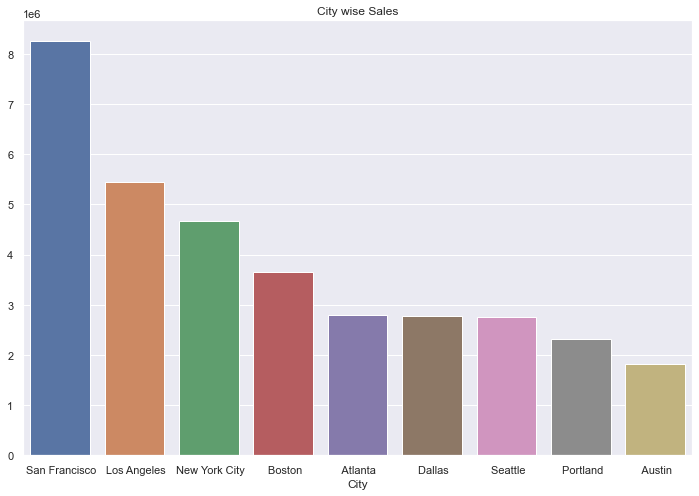

In [27]:
#plotting above data to see graphically which city sales more products
plt.figure(figsize=(12,8))
ax=sns.barplot(x=df.groupby(['City'])['Sales'].sum().sort_values(ascending=False).keys(),
            y=df.groupby(['City'])['Sales'].sum().sort_values(ascending=False).values)
ax.set_title("City wise Sales")

 San Fransisco is the highest sale compare to other cities.

##### b-Which Month had the highest amount of sales overall?

In [28]:
df['Order Date'] = pd.to_datetime(df['Order Date'])  #converting 'order date' into datetime format

In [29]:
df['Month']=df['Order Date'].dt.month_name()      #creating new column 'month' with month name

In [30]:
df.head()   #top 5 rows

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Sales,Month
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Boston,700.00,January
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Portland,14.95,January
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",San Francisco,23.98,January
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Los Angeles,149.99,January
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Austin,11.99,January


In [31]:
#we’re going to group sales by the month and summing all the values based on the group.
df.groupby(['Month'])['Sales'].sum().sort_values(ascending=False)

Month
December     4.608296e+06
October      3.734778e+06
April        3.389218e+06
November     3.197875e+06
May          3.150616e+06
March        2.804973e+06
July         2.646461e+06
June         2.576280e+06
August       2.241083e+06
February     2.200078e+06
September    2.094466e+06
January      1.821413e+06
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Monthly Sales graph')

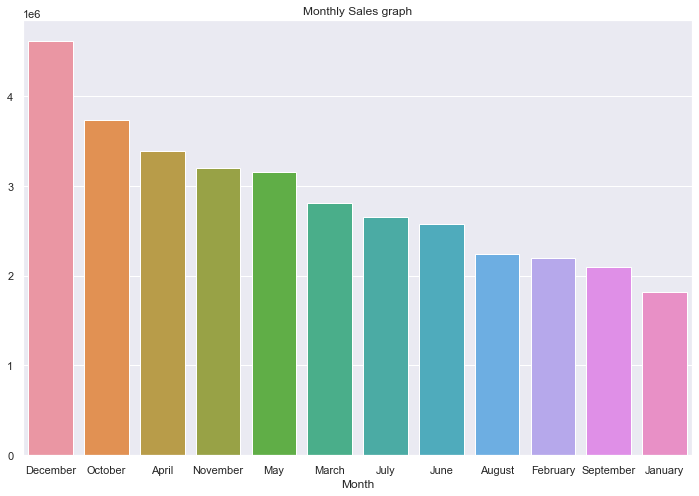

In [32]:
#plotting above data to see graphically which month sales more products
plt.figure(figsize=(12,8))
ax=sns.barplot(x=df.groupby(['Month'])['Sales'].sum().sort_values(ascending=False).keys(),
            y=df.groupby(['Month'])['Sales'].sum().sort_values(ascending=False).values)
ax.set_title("Monthly Sales graph")

The best Month for sales was DECEMBER.

Total sales in December is $4619297.

##### c-Most bought products per city.

In [33]:
#we’re going to group Quantity ordered by the city and product and summing all the values based on the group.
# and sorting every city quantity ordered into higher to lower
df2=df.groupby(['City','Product'],as_index=False)['Quantity Ordered'].sum().sort_values(by='Quantity Ordered',ascending=False)

In [34]:
df2

,City,Product,Quantity Ordered
138,San Francisco,AAA Batteries (4-pack),7404.0
137,San Francisco,AA Batteries (4-pack),6549.0
148,San Francisco,USB-C Charging Cable,5883.0
145,San Francisco,Lightning Charging Cable,5540.0
81,Los Angeles,AAA Batteries (4-pack),4958.0
...,...,...,...
68,Dallas,LG Washing Machine,51.0
67,Dallas,LG Dryer,44.0
124,Portland,LG Dryer,37.0
125,Portland,LG Washing Machine,37.0


In [35]:
city=df2['City'].unique()  # seeing uinque values in city and storing into city

In [36]:
# selecting only top 3 items from each city and storing into new dataframe called 'df3'
df3=pd.DataFrame()   
for i in city:
    df3=df3.append(df2[df2['City']==i][:3],ignore_index = True)

In [37]:
df3  # dataframe with top 3 items from each city

,City,Product,Quantity Ordered
0,San Francisco,AAA Batteries (4-pack),7404.0
1,San Francisco,AA Batteries (4-pack),6549.0
2,San Francisco,USB-C Charging Cable,5883.0
3,Los Angeles,AAA Batteries (4-pack),4958.0
4,Los Angeles,AA Batteries (4-pack),4434.0
5,Los Angeles,USB-C Charging Cable,3776.0
6,New York City,AAA Batteries (4-pack),4119.0
7,New York City,AA Batteries (4-pack),3629.0
8,New York City,USB-C Charging Cable,3263.0
9,Boston,AAA Batteries (4-pack),3458.0


In [38]:
#selecting top product bauch from each city
top_product_by_city=df3.drop_duplicates(subset='City')

In [39]:
top_product_by_city

,City,Product,Quantity Ordered
0,San Francisco,AAA Batteries (4-pack),7404.0
3,Los Angeles,AAA Batteries (4-pack),4958.0
6,New York City,AAA Batteries (4-pack),4119.0
9,Boston,AAA Batteries (4-pack),3458.0
12,Dallas,AAA Batteries (4-pack),2500.0
15,Seattle,AAA Batteries (4-pack),2443.0
18,Atlanta,AAA Batteries (4-pack),2358.0
21,Portland,AAA Batteries (4-pack),2078.0
24,Austin,AAA Batteries (4-pack),1668.0


<AxesSubplot:xlabel='City', ylabel='Quantity Ordered'>

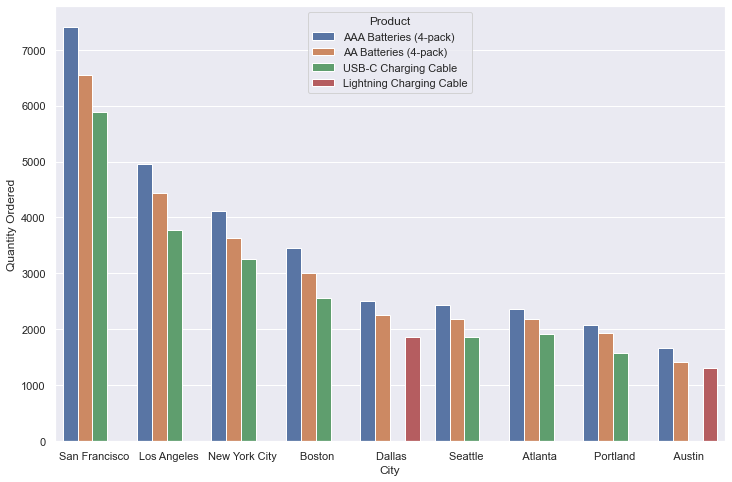

In [40]:
#plotting top 3 baught product from each city
plt.figure(figsize=(12,8))
sns.barplot(x='City',y='Quantity Ordered',hue='Product',data=df3)

by graph top baught product from each city

San Francisco:-	AAA Batteries (4-pack)

Los Angeles:-	AAA Batteries (4-pack)

New York City:-	AAA Batteries (4-pack)

Boston:-	AAA Batteries (4-pack)

Atlanta:-	AAA Batteries (4-pack)

Dallas:-	AAA Batteries (4-pack)

Seattle:-	AAA Batteries (4-pack)

Portland:-	AAA Batteries (4-pack)

Austin:-	AAA Batteries (4-pack)

San Fransisco is the highest sale compare to other cities.there are higher demand of prodcuts, Maybe the advertisement is better in San Fransisco. We can use this data to improve the sales of bussiness.

### 5-Find out the distribution of sales over different times of the day (Morning, Afternoon, Evening, Night) and answer the following for each city;

In [41]:
df['Hour'] = (df['Order Date']).dt.hour   #converting date time into hour and storing in 'Hour' column

In [42]:
#selecting time and converting 'Night','Morning','Afternoon','Evening'
df['time of day']=pd.cut(df['Order Date'].dt.hour,
               [0,6,12,18,23],
               labels=['Night','Morning','Afternoon','Evening'],
               include_lowest=True)

##### a-What products are mostly sold at different times of the day?

<AxesSubplot:xlabel='Hour', ylabel='Product'>

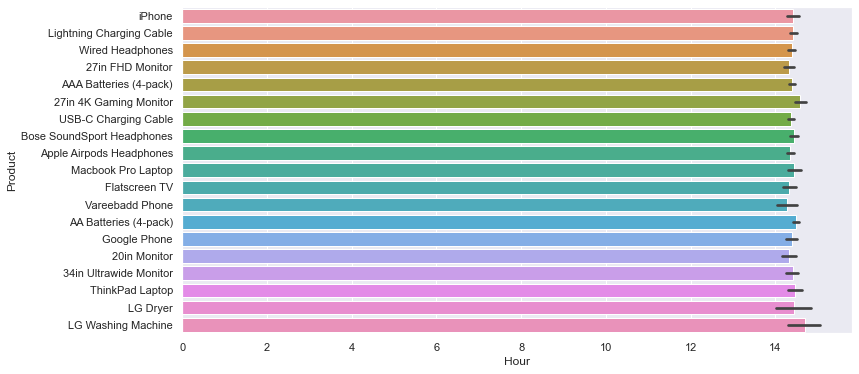

In [43]:
#plotting barplot between 'product' and 'hour'
plt.figure(figsize = (12,6))
sns.barplot(y= df['Product'],x=df['Hour'])

<AxesSubplot:xlabel='count', ylabel='Product'>

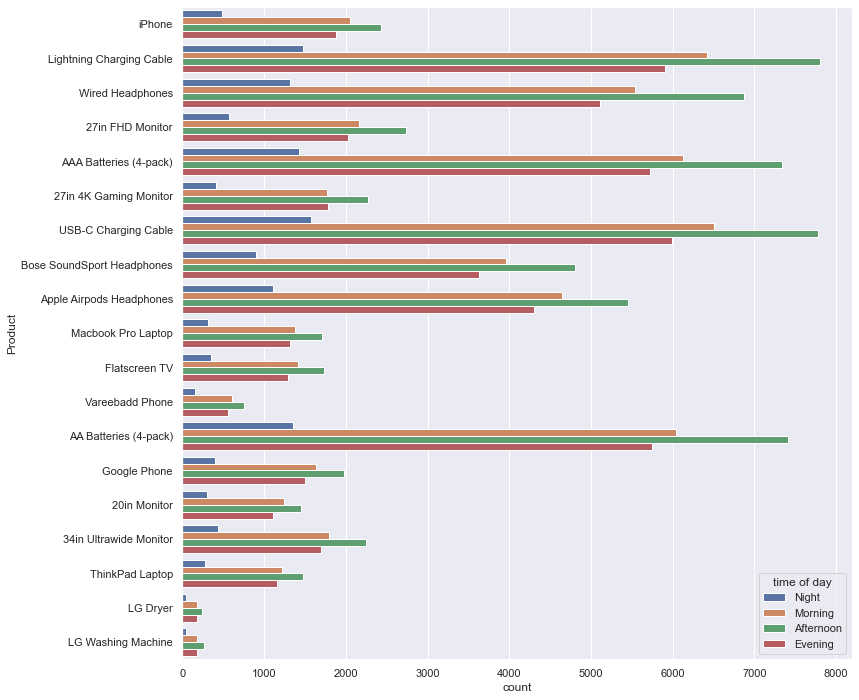

In [44]:
#plotting barplot between 'product' and 'hour'
plt.figure(figsize = (12,12))
sns.countplot(y= df['Product'],hue=df['time of day'])

SO we can see that every product has higher sales in after noon

##### b- Which time of day has the most sales?

In [45]:
##we’re going to group sales by the 'time of day' and summing all the values based on the group.
df.groupby(['time of day'])['Sales'].sum().sort_values(ascending=False)

time of day
Afternoon    1.242296e+07
Morning      1.012913e+07
Evening      9.517583e+06
Night        2.395869e+06
Name: Sales, dtype: float64

Text(0.5, 1.0, 'time of day Sales graph')

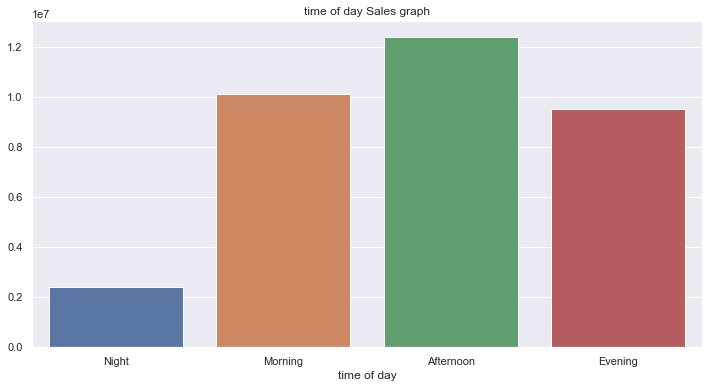

In [46]:
# plotting  barplot 'sales' with respect to 'time of day'
plt.figure(figsize=(12,6))
ax=sns.barplot(x=df.groupby(['time of day'])['Sales'].sum().sort_values(ascending=False).keys(),
            y=df.groupby(['time of day'])['Sales'].sum().sort_values(ascending=False).values)
ax.set_title("time of day Sales graph")


##### Output Description-

Based on your analysis, suggest the best working hours is 'Afternnon' and the best products 'USB-C Charging Cable'for the retail stores in each city.

### 6- Find out the pair of products that are most sold together. For example, generally, we would expect a person who buys an iPhone 11 to also buy the Apple Airpods together with it. Identify such pairs of products and suggest what promotional offers should the retail company come up with based on your outcome.

In [47]:
df4=df[df['Order ID'].duplicated(keep=False)] #checking product baught with same id

In [48]:
df4

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Sales,Month,Hour,time of day
41,141275,USB-C Charging Cable,1.0,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",Austin,11.95,January,16,Afternoon
42,141275,Wired Headphones,1.0,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",Austin,11.99,January,16,Afternoon
57,141290,Apple Airpods Headphones,1.0,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",Los Angeles,150.00,January,8,Morning
58,141290,AA Batteries (4-pack),3.0,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",Los Angeles,11.52,January,8,Morning
133,141365,Vareebadd Phone,1.0,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",New York City,400.00,January,11,Morning
...,...,...,...,...,...,...,...,...,...,...,...
186761,319584,Wired Headphones,1.0,11.99,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035",Portland,11.99,December,0,Night
186773,319596,iPhone,1.0,700.00,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",New York City,700.00,December,8,Morning
186774,319596,Lightning Charging Cable,1.0,14.95,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",New York City,14.95,December,8,Morning
186809,319631,34in Ultrawide Monitor,1.0,379.99,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301",Austin,379.99,December,22,Evening


In [49]:
#merge them in every situation in groupby without dropping the duplicate values.
df4['Product_together']=df4.groupby('Order ID')['Product'].transform(lambda x:','.join(x)) 
df4

<ipython-input-49-d826ec856189>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Product_together']=df4.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Sales,Month,Hour,time of day,Product_together
41,141275,USB-C Charging Cable,1.0,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",Austin,11.95,January,16,Afternoon,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1.0,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",Austin,11.99,January,16,Afternoon,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1.0,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",Los Angeles,150.00,January,8,Morning,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3.0,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",Los Angeles,11.52,January,8,Morning,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1.0,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",New York City,400.00,January,11,Morning,"Vareebadd Phone,Wired Headphones"
...,...,...,...,...,...,...,...,...,...,...,...,...
186761,319584,Wired Headphones,1.0,11.99,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035",Portland,11.99,December,0,Night,"iPhone,Wired Headphones"
186773,319596,iPhone,1.0,700.00,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",New York City,700.00,December,8,Morning,"iPhone,Lightning Charging Cable"
186774,319596,Lightning Charging Cable,1.0,14.95,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",New York City,14.95,December,8,Morning,"iPhone,Lightning Charging Cable"
186809,319631,34in Ultrawide Monitor,1.0,379.99,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301",Austin,379.99,December,22,Evening,"34in Ultrawide Monitor,Lightning Charging Cable"


In [50]:
#Now let’s drop the rows with duplicate values.
df4[['Order ID','Product_together']].drop_duplicates()

,Order ID,Product_together
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
186710,319536,"Macbook Pro Laptop,Wired Headphones"
186731,319556,"Google Phone,Wired Headphones"
186760,319584,"iPhone,Wired Headphones"
186773,319596,"iPhone,Lightning Charging Cable"


In [51]:
#we need to count all the combination of products together. We’re gonna use itertools and collections libraries.

from itertools import combinations 
from collections import Counter
count = Counter()

for row in df4['Product_together']:  
    row_list = row.split(',')   #spliting product_together and storing into 'row_list'
    count.update(Counter(combinations(row_list,2)))
    #it will  combine both row_list that has splitted and update count with every loop
keys,values=[],[]     #creating to list keys and values to plot graph
for key, value in count.most_common(10):
    print (key, value)
    keys.append(str(key))
    values.append(int(value))
    

('iPhone', 'Lightning Charging Cable') 2127
('Google Phone', 'USB-C Charging Cable') 2106
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 943
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 446
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253


Text(0.5, 1.0, 'Product baught together')

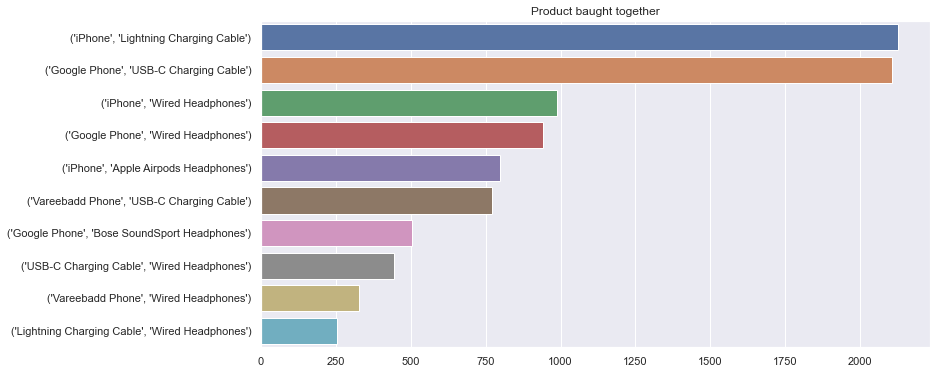

In [52]:
#creating plot with keys and values of caombination of product baught together
plt.figure(figsize=(12,6))
ax=sns.barplot(x=values,y=keys)
ax.set_title("Product baught together")

##### Output-Description

Now we can clearly see that the most often products sold together are iPhone and Lightning Charging Cable with 2127 transactions